In [68]:
import numpy as np
import copy
from collections import defaultdict
%matplotlib inline
from datetime import datetime

import matplotlib
import numpy as np
import matplotlib.pyplot as plt

class MountainCar():
    def __init__(self):
        self.min_x = -1.2
        self.max_x = 0.6
        
        self.possible_actions = [-1,0,1]
        self.reset_state()
        return
    
    def next_step(self,action):
        self.time+=1
        self.reward = -1
        self.velocity += 0.001*action - 0.0025*np.cos(3*self.pos)
        if(self.velocity<-0.07):
            self.velocity = -0.07
        if(self.velocity>0.07):
            self.velocity = 0.07
        self.pos = self.pos + self.velocity
        
        
        if(self.pos<-1.2):
            self.pos = -1.2
        if(self.pos>0.5):
            self.pos = 0.5
            self.reward = 0
            self.terminated = True
        
        if(self.time == 20000):
            self.terminated = True
        
        self.state = (self.pos,self.velocity)
        return (self.state), self.reward
    
    def reset_state(self):
        self.pos = -0.5
        self.velocity = 0
        self.state = (self.pos,self.velocity)
        self.time = 0
        self.terminated = False
        

In [74]:
import numpy as np
class StraightCar():
    def __init__(self):
        self.min_x = -1.2
        self.max_x = 0.6
        
        self.possible_actions = [-1,0,1]
        self.reset_state()
        return
    
    def next_step(self,action):
        self.time+=1
        self.reward = -1
        self.velocity += 0.001*action 
        
        if(self.velocity<0):
            self.velocity = 0
        self.pos = self.pos + self.velocity
        
        
        if(self.pos>0.5):
            self.pos = 0.5
            self.reward = 0
            self.terminated = True
        
        if(self.time == 20000):
            self.terminated = True
        
        self.state = (self.pos,self.velocity)
        return (self.state), self.reward
    
    def reset_state(self):
        self.pos = 0.0
        self.velocity = 0
        self.state = (self.pos,self.velocity)
        self.time = 0
        self.reward = -1
        self.terminated = False
        

In [4]:
sc = StraightCar()

while(not sc.terminated):
    sc.next_step(1)
    print sc.pos, sc.velocity

0.001 0.001
0.003 0.002
0.006 0.003
0.01 0.004
0.015 0.005
0.021 0.006
0.028 0.007
0.036 0.008
0.045 0.009
0.055 0.01
0.066 0.011
0.078 0.012
0.091 0.013
0.105 0.014
0.12 0.015
0.136 0.016
0.153 0.017
0.171 0.018
0.19 0.019
0.21 0.02
0.231 0.021
0.253 0.022
0.276 0.023
0.3 0.024
0.325 0.025
0.351 0.026
0.378 0.027
0.406 0.028
0.435 0.029
0.465 0.03
0.496 0.031
0.5 0.032


In [ ]:
mc = MountainCar()



while(not mc.terminated):
    mc.next_step(1)
    print mc.pos, mc.velocity

In [5]:
class QLearning():
    def __init__(self):
        self.Q[W,a] = 0
        return
    
    def Q(s,a):
        return 1
    def Q_w(s,a):
        return 1
    
    
    def run(self,env):
        while(False):
            env.reset_state()
            s = copy.deepcopy(env.state)
            while(not env.terminated):
                a = chooseAction(s,env.possible_actions,egreedy=True)
                next_state,r = env.next_step(a)
                max_val = None
                for a_prime in env.possible_actions:
                    if(max_val==None):
                        max_val = Q_w(next_state,a_prime)
                    else:
                        max_val = max(max_val,Q_w(next_state,a_prime))
                val = Q(W,a) + self.alpha*(r + self.gamma * max_val) - Q_w(s,a) * dQ_w(s,a)
                # TO DO Update Q(W,a) to val
                s = copy.deepcopy(next_state)


In [ ]:
# class SARSA():
#     def __init__(self):
#         self.W = 0
#         self.alpha = 1
#         self.gamma = 1
#         copy.deepcopy(a_prim)
#         return
    
#     def run(self, env):
#         while():
#             env.reset_state()
#             s = copy.deepcopy(env.state)
#             a = chooseAction(s,env.possible_actions,egreedy=True)
#             while(not env.terminated):
#                 next_state,r = env.next_step(a)
#                 a_prime = chooseAction(next_state,env.possible_actions,egreedy=True)
#                 self.W = self.W + self.alpha*(r + self.gamma * Q_w(next_state,a_prime) - Q_w(s,a)) * dQ_w(s,a)
#                 a = copy.deepcopy(a_prime)
#                 s = copy.deepcopy(next_state)
                
                
                

In [70]:
class FirstOrderFourier():
    def __init__(self, order):
        self.order = order
        c = np.arange(order)
        self.c = [(v1,v2) for v2 in c for v1 in c]
        self.length = len(self.c)
        return
    
    def normalize(self, pos, vel):
#         print pos,"***"
        pos = (pos + 1.2)/(1.7)
        vel = (vel + 0.07)/(0.14)
        return pos,vel
    
    
    def getFeature(self,s):
        v = np.ones(self.order*self.order) # 3 for len of actions
        pos_v, vel_v = s
        pos_v, vel_v = self.normalize(pos_v,vel_v)
        i=0
        for c1,c2 in self.c:
            v[i] = np.cos(np.pi * ((c1 * pos_v) + ( c2 * vel_v)))
            i+=1
        return np.tile(v, 3)


        

In [75]:
import random

def decision(probability):
    return random.random() < probability
class SARSA():
    def __init__(self, env, order=3, alpha=0.05, gamma=0.9, epsilon=0.1 ):
        self.total = order*order
        self.W = defaultdict(lambda: np.array([0.0] * (self.total * len(env.possible_actions)) ))
        self.alpha = alpha
        self.gamma = gamma
        self.epsilon = epsilon
        self.env=env
        self.f = FirstOrderFourier(order)
        self.episode_count = 0
        self.episode_stop_count = 10
        self.episodes = np.array([0.0] * self.episode_stop_count)
        return
    
    def selectEGreedy(self, state):
        feature = self.phi(state[0],state[1])
        if(decision(self.epsilon)):
            # Return some value, exploring
            return random.choice(self.env.possible_actions)
        maxVal = None
        maxAct = None
        y = self.W[state]*feature
        result = np.add.reduceat(y, [0,self.total,2*self.total])
        return np.argmax(result) - 1
        
    def phi(self, s,v):
        state = (s,v)
        return self.f.getFeature(state)
    
    def run(self, env):
        while(self.episode_count < self.episode_stop_count):
            
            env.reset_state()
            s = copy.deepcopy(env.state)
            a = self.selectEGreedy(s)
            while(not env.terminated):
                next_state,r = env.next_step(a)
                a_prime = self.selectEGreedy(next_state)
                phi_v = self.phi(s[0],s[1])
                delta_t = (r + (self.gamma * (np.dot(self.W[(next_state,a_prime)],self.phi(next_state[0],next_state[1])))) - (np.dot(self.W[(s,a)],phi_v)))
                self.W[(s,a)] += (self.alpha* delta_t * phi_v)
                a = copy.deepcopy(a_prime)
                s = copy.deepcopy(next_state)
            self.episodes[self.episode_count] = -(float(env.time+1))/(2)
            self.episode_count+=1


In [76]:
mc = MountainCar()
s = SARSA(mc,2)
s.run(mc)

In [77]:
def plot(a):
    plt.figure()
    for i in range(len(a)):
        plt.plot(i, a[i])
    plt.show()

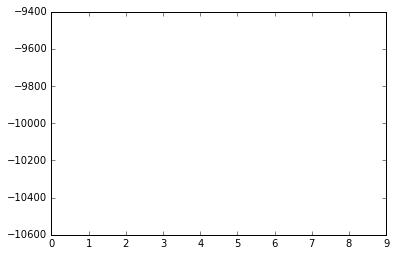

In [78]:
plot(s.episodes)